In [101]:
import pandas as pd
import numpy as np

In [102]:
df=pd.read_csv("F:/Dinesh personal/ExcelR/assignments/Assignment 4/delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [103]:
df.shape

(21, 2)

In [104]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [105]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [106]:
df1=df.rename({'Delivery Time': 'delivery_time','Sorting Time':'sorting_time'}, axis=1)
df1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

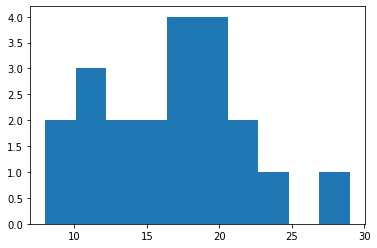

In [108]:
plt.hist(df1.delivery_time)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

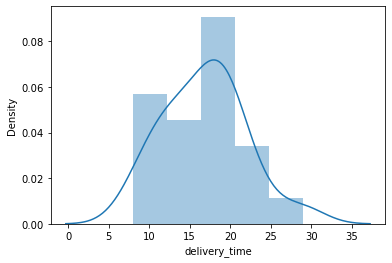

In [109]:
sns.distplot(df1.delivery_time)

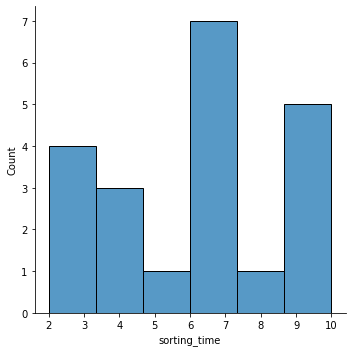

In [110]:
sns.displot(df1.sorting_time)

In [111]:
import statsmodels.formula.api as smf

In [112]:
model=smf.ols("delivery_time~sorting_time",data=df1).fit()

In [113]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           3.98e-06
Time:                        08:29:25   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

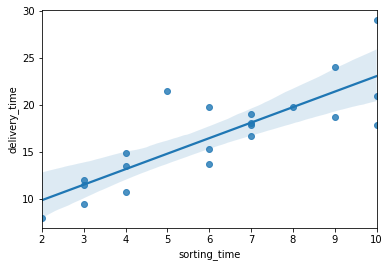

In [114]:
sns.regplot(x="sorting_time", y="delivery_time", data=df1);

In [115]:
transformation=df1['sorting_time'].transform([np.log])
print(transformation)


         log
0   2.302585
1   1.386294
2   1.791759
3   2.197225
4   2.302585
5   1.791759
6   1.945910
7   1.098612
8   2.302585
9   2.197225
10  2.079442
11  1.386294
12  1.945910
13  1.098612
14  1.098612
15  1.386294
16  1.791759
17  1.945910
18  0.693147
19  1.945910
20  1.609438


In [116]:
transformation1=df1['sorting_time'].transform([np.sqrt])
transformation2=df1['sorting_time'].transform([np.exp])
transformation3=df1['sorting_time'].transform([np.reciprocal])
print(transformation1)
print(transformation2)
print(transformation3)

        sqrt
0   3.162278
1   2.000000
2   2.449490
3   3.000000
4   3.162278
5   2.449490
6   2.645751
7   1.732051
8   3.162278
9   3.000000
10  2.828427
11  2.000000
12  2.645751
13  1.732051
14  1.732051
15  2.000000
16  2.449490
17  2.645751
18  1.414214
19  2.645751
20  2.236068
             exp
0   22026.465795
1      54.598150
2     403.428793
3    8103.083928
4   22026.465795
5     403.428793
6    1096.633158
7      20.085537
8   22026.465795
9    8103.083928
10   2980.957987
11     54.598150
12   1096.633158
13     20.085537
14     20.085537
15     54.598150
16    403.428793
17   1096.633158
18      7.389056
19   1096.633158
20    148.413159
    reciprocal
0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
13           0
14           0
15           0
16           0
17           0
18           0
19           0
20           0


In [117]:
df1['transformation']=transformation

In [118]:
df1['transformation1']=transformation1


In [119]:
df1['transformation2']=transformation2

In [120]:
df1['transformation3']=transformation3

In [121]:
df1.head()

,delivery_time,sorting_time,transformation,transformation1,transformation2,transformation3
0,21.00,10,2.302585,3.162278,22026.465795,0
1,13.50,4,1.386294,2.000000,54.598150,0
2,19.75,6,1.791759,2.449490,403.428793,0
3,24.00,9,2.197225,3.000000,8103.083928,0
4,29.00,10,2.302585,3.162278,22026.465795,0


In [122]:
model1=smf.ols("delivery_time~transformation",data=df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           2.64e-06
Time:                        08:29:26   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1597      2.455      0.472      0.642      -3.978       6.297
transformation     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
model2=smf.ols("delivery_time~transformation1",data=df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           2.61e-06
Time:                        08:29:26   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.5188      2.995     -0.841      0.411      -8.788       3.751
transformation1     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
model3=smf.ols("delivery_time~transformation2",data=df1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Wed, 13 Oct 2021   Prob (F-statistic):            0.00396
Time:                        08:29:26   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          15.0836      1.047     14.406      0.000      12.892      17.275
transformation2     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
model3=smf.ols("delivery_time~transformation3",data=df1).fit()
model3.summary()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 13 Oct 2021   Prob (F-statistic):                nan
Time:                        08:29:27   Log-Likelihood:                -63.396
No. Observations:                  21   AIC:                             128.8
Df Residuals:                      20   BIC:                             129.8
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.7910      1.107     15.162      0.000      14.481      19.101
transformation3          0          0        nan        nan           0           0
==============================================================================
Omnibus:                        0.864   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.374
Skew:                           0.327   Prob(JB):                        0.829
Kurtosis:                       2.974   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [126]:
#TAKE np.exp = Exponential, because it gives us better R and Adj.R squared value
#
newdata=pd.Series([7,8])

In [127]:
data_pred=pd.DataFrame(newdata,columns=['transformation1'])

In [129]:
model2.predict(data_pred)

0    53.037299
1    60.973889
dtype: float64

# SALARY HIKE

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [132]:
data=pd.read_csv("F:\\Dinesh personal\\ExcelR\\assignments\\Assignment 4\\Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [133]:
data.shape

(30, 2)

In [134]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [135]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

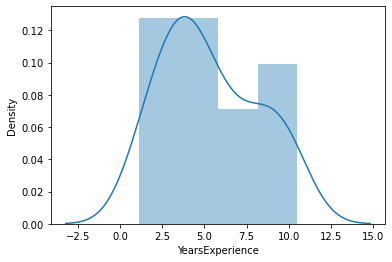

In [136]:
sns.distplot(data.YearsExperience)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

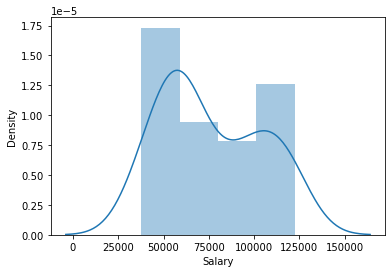

In [137]:
sns.distplot(data.Salary)

In [142]:
model4=smf.ols("Salary~YearsExperience",data=data).fit()

In [143]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           1.14e-20
Time:                        08:34:55   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


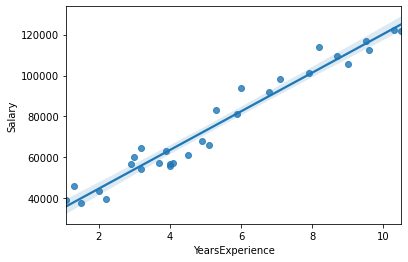

In [140]:
sns.regplot("YearsExperience","Salary",data=data);

In [144]:
transformation5=data['YearsExperience'].transform([np.sqrt])
transformation6=data['YearsExperience'].transform([np.exp])
transformation7=data['YearsExperience'].transform([np.reciprocal])
transformation8=data['YearsExperience'].transform([np.log])
print(transformation5)
print(transformation6)
print(transformation7)
print(transformation8)

        sqrt
0   1.048809
1   1.140175
2   1.224745
3   1.414214
4   1.483240
5   1.702939
6   1.732051
7   1.788854
8   1.788854
9   1.923538
10  1.974842
11  2.000000
12  2.000000
13  2.024846
14  2.121320
15  2.213594
16  2.258318
17  2.302173
18  2.428992
19  2.449490
20  2.607681
21  2.664583
22  2.810694
23  2.863564
24  2.949576
25  3.000000
26  3.082207
27  3.098387
28  3.209361
29  3.240370
             exp
0       3.004166
1       3.669297
2       4.481689
3       7.389056
4       9.025013
5      18.174145
6      20.085537
7      24.532530
8      24.532530
9      40.447304
10     49.402449
11     54.598150
12     54.598150
13     60.340288
14     90.017131
15    134.289780
16    164.021907
17    200.336810
18    365.037468
19    403.428793
20    897.847292
21   1211.967074
22   2697.282328
23   3640.950307
24   6002.912217
25   8103.083928
26  13359.726830
27  14764.781566
28  29732.618853
29  36315.502674
    reciprocal
0     0.909091
1     0.769231
2     0.666667
3     0.50

In [145]:
data['transformation5']=transformation5

In [147]:
data['transformation6']=transformation6

In [148]:
data['transformation7']=transformation7

In [149]:
data['transformation8']=transformation8

In [150]:
data.head()

,YearsExperience,Salary,transformation5,transformation7,transformation6,transformation8
0,1.1,39343.0,1.048809,0.909091,3.004166,0.095310
1,1.3,46205.0,1.140175,0.769231,3.669297,0.262364
2,1.5,37731.0,1.224745,0.666667,4.481689,0.405465
3,2.0,43525.0,1.414214,0.500000,7.389056,0.693147
4,2.2,39891.0,1.483240,0.454545,9.025013,0.788457


In [151]:
model5=smf.ols("Salary~transformation5",data=data).fit()

In [152]:
model6=smf.ols("Salary~transformation6",data=data).fit()

In [153]:
model7=smf.ols("Salary~transformation7",data=data).fit()

In [154]:
model8=smf.ols("Salary~transformation8",data=data).fit()

In [156]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           8.57e-18
Time:                        08:40:55   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
transformation5   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           2.72e-05
Time:                        08:41:09   Log-Likelihood:                -339.03
No. Observations:                  30   AIC:                             682.1
Df Residuals:                      28   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6.757e+04   4065.396     16.620      0.000    5.92e+04    7.59e+04
transformation6     2.1360      0.427      5.007      0.000       1.262       3.010
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                1.966
Skew:                           0.276   Prob(JB):                        0.374
Kurtosis:                       1.874   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     40.06
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           7.58e-07
Time:                        08:41:21   Log-Likelihood:                -335.30
No. Observations:                  30   AIC:                             674.6
Df Residuals:                      28   BIC:                             677.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.043e+05   5533.996     18.842      0.000    9.29e+04    1.16e+05
transformation7 -1.036e+05   1.64e+04     -6.329      0.000   -1.37e+05   -7.01e+04
==============================================================================
Omnibus:                       10.284   Durbin-Watson:                   0.220
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                2.740
Skew:                           0.290   Prob(JB):                        0.254
Kurtosis:                       1.638   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           3.25e-13
Time:                        08:41:28   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
transformation8  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

model 4 gives you best R and Adj.R squared values, so we are taking model4

In [162]:
newdata=pd.Series([3,5])

In [163]:
datapred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [164]:
model4.predict(datapred)

0    54142.087163
1    73042.011806
dtype: float64